<a href="https://colab.research.google.com/github/Aashvi123/THESPARKSFOUNDATION/blob/main/Python_midterm_23200323.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
#Load in the weather.csv dataset into Python as a pandas DataFrame. Describe the data.
#How many years of recordings are included? What is the temporal resolution of the data?
#Which weather measurements are reported?

import pandas as pd

# Loading the dataset into a DataFrame, skipping the first 10 rows
df = pd.read_csv('weather_1819.csv', skiprows=11)

# Describing the data
data_description = df.describe()

# Checking for unique years in the dataset
unique_years = df['year'].unique()

# Calculating the temporal resolution
temporal_resolution = df['day'].nunique()

# List of weather measurements reported
weather_measurements = df.columns[4:]

# Printing the results
print("Data Description:")
print(data_description)
print("\nNumber of Years of Recordings:", len(unique_years))
print("Temporal Resolution (Number of Days in the Dataset):", temporal_resolution)
print("Weather Measurements Reported:", weather_measurements)



Data Description:
               day         year        maxtp        mintp         rain  \
count  2920.000000  2920.000000  2902.000000  2902.000000  2897.000000   
mean     15.720548  2018.500000    13.283150     6.432977     3.063583   
std       8.797754     0.500086     5.146289     4.368755     5.053881   
min       1.000000  2018.000000    -1.800000    -7.000000     0.000000   
25%       8.000000  2018.000000     9.500000     3.100000     0.000000   
50%      16.000000  2018.500000    12.800000     6.400000     0.700000   
75%      23.000000  2019.000000    17.100000     9.600000     4.000000   
max      31.000000  2019.000000    32.000000    18.900000    54.600000   

              wdsp           hg          sun  
count  2915.000000  2904.000000  2913.000000  
mean      9.481475    25.443871     3.783797  
std       3.820605     9.278313     3.850012  
min       2.300000     7.000000     0.000000  
25%       6.500000    19.000000     0.300000  
50%       8.900000    24.000000  

***Question 2:*** Determine how many missing values there are in each column of the dataset. Can you think
of a reason why these values are missing? Discuss different strategies for filling the missing
values, highlighting the advantages and disadvantages of each strategy, in the context of this
dataset.

In [92]:
# Counting missing values in each column
missing_values = df.isna().sum()

# Printing the number of missing values in each column
print("Missing Values in Each Column:")
print(missing_values)


Missing Values in Each Column:
day         0
month       0
year        0
station     0
maxtp      18
mintp      18
rain       23
wdsp        5
hg         16
sun         7
dtype: int64


As for the reasons why these values are missing, there can be several factors contributing to missing data in a weather dataset:

**Data Collection Issues:** Weather stations may experience data collection problems due to technical issues, sensor failures, or human errors. This can lead to missing values for various parameters.

**Temporal Gaps:** Sometimes, certain weather parameters may not be recorded at specific times, resulting in gaps in the data. For example, sunshine duration data may be missing on cloudy or rainy days.

**Station Relocation:** If the weather station is relocated or undergoes changes, there might be missing data during the transition period.

**Data Transmission Issues:** Data transmission errors can result in missing values as well.

Regarding strategies for filling missing values in the context of this dataset, here are some common approaches:

Forward Fill or Backward Fill: You can use the previous day's value (backward fill) or the next day's value (forward fill) to fill missing values. This method is suitable for parameters that don't change abruptly from day to day.

Interpolation: Interpolation methods, such as linear or cubic interpolation, can be used to estimate missing values based on the trend in the data. It works well when the data has a clear pattern.

Mean, Median, or Mode Imputation: Replacing missing values with the mean, median, or mode of the column can be a simple way to fill gaps. This method is suitable for parameters with relatively stable and symmetric distributions.

Seasonal Decomposition: For time series data, you can use seasonal decomposition to identify and fill missing values based on seasonal patterns.

Machine Learning Models: More advanced techniques involve using machine learning models to predict missing values based on the relationships between different weather parameters and historical data.

Advantages and disadvantages of these strategies:

**Forward Fill/Backward Fill:**

Advantages: Simple and quick. Works well for data with gradual changes.
Disadvantages: Inaccurate for data with abrupt changes.

**Interpolation:**

Advantages: Captures trends in the data, works well for continuous variables.
Disadvantages: Sensitive to outliers, may not be suitable for non-linear data.

**Mean/Median/Mode Imputation:**

Advantages: Easy to implement, maintains data distribution.
Disadvantages: Ignores temporal trends, can introduce bias.

**Seasonal Decomposition:**

Advantages: Captures seasonal patterns, effective for time series data.
Disadvantages: Requires knowledge of the data's seasonality.

**Machine Learning Models:**

Advantages: Can capture complex relationships, adapt to different data patterns.
Disadvantages: Requires more effort and expertise, may overfit the data.


**Question3:** Write code to answer the following questions: (15 marks)
1. At what station and on what date was the highest wind speed recorded?
2. At what station and on what date was the highest maximum air temperature recorded?
3. At what station and on what date was the largest amount of rain recorded?

In [93]:
# Finding the row with the highest wind speed
max_wind_speed_row = df[df['wdsp'] == df['wdsp'].max()]

# Extracting the station and date
station_highest_wind_speed = max_wind_speed_row['station'].values[0]
date_highest_wind_speed = f"{max_wind_speed_row['day'].values[0]} {max_wind_speed_row['month'].values[0]} {max_wind_speed_row['year'].values[0]}"

print(f"Highest Wind Speed: {station_highest_wind_speed} on {date_highest_wind_speed}")


Highest Wind Speed: Dublin Airport on 2 mar 2018


In [94]:
# Finding the row with the highest maximum air temperature
max_temp_row = df[df['maxtp'] == df['maxtp'].max()]

# Extracting the station and date
station_highest_max_temp = max_temp_row['station'].values[0]
date_highest_max_temp = f"{max_temp_row['day'].values[0]} {max_temp_row['month'].values[0]} {max_temp_row['year'].values[0]}"

print(f"Highest Maximum Air Temperature: {station_highest_max_temp} on {date_highest_max_temp}")


Highest Maximum Air Temperature: Shannon Airport on 28 jun 2018


In [95]:
# Finding the row with the largest amount of rain
max_rain_row = df[df['rain'] == df['rain'].max()]

# Extracting the station and date
station_largest_rain = max_rain_row['station'].values[0]
date_largest_rain = f"{max_rain_row['day'].values[0]} {max_rain_row['month'].values[0]} {max_rain_row['year'].values[0]}"

print(f"Largest Amount of Rain: {station_largest_rain} on {date_largest_rain}")


Largest Amount of Rain: Cork Airport on 15 apr 2019


**Question 4:** Create a numerical summary (mean, standard deviation, minimum, maximum, etc.) for each
of the weather measurements. Discuss and interpret your results.

In [96]:
# Generating a numerical summary for each weather measurement
summary_statistics = df.describe()

# Printing the summary statistics
print("Numerical Summary for Weather Measurements:")
print(summary_statistics)


Numerical Summary for Weather Measurements:
               day         year        maxtp        mintp         rain  \
count  2920.000000  2920.000000  2902.000000  2902.000000  2897.000000   
mean     15.720548  2018.500000    13.283150     6.432977     3.063583   
std       8.797754     0.500086     5.146289     4.368755     5.053881   
min       1.000000  2018.000000    -1.800000    -7.000000     0.000000   
25%       8.000000  2018.000000     9.500000     3.100000     0.000000   
50%      16.000000  2018.500000    12.800000     6.400000     0.700000   
75%      23.000000  2019.000000    17.100000     9.600000     4.000000   
max      31.000000  2019.000000    32.000000    18.900000    54.600000   

              wdsp           hg          sun  
count  2915.000000  2904.000000  2913.000000  
mean      9.481475    25.443871     3.783797  
std       3.820605     9.278313     3.850012  
min       2.300000     7.000000     0.000000  
25%       6.500000    19.000000     0.300000  
50%    

**day (Day of the Month):**
Mean: 15.72
Standard Deviation: 8.80
Minimum: 1
Maximum: 31
Interpretation: This column represents the day of the month. The mean and standard deviation show the average day and the spread of days, respectively. The minimum and maximum indicate the range of days, from the 1st to the 31st.

**year (Year):**
Mean: 2018.5
Standard Deviation: 0.50
Minimum: 2018
Maximum: 2019
Interpretation: This column represents the year. In this dataset, it covers a range of only two years, with a mean of 2018.5, which is expected, given the range. The standard deviation is small, indicating that the years are close to the mean.

**maxtp (Maximum Temperature):**
Mean: 13.28°C
Standard Deviation: 5.15°C
Minimum: -1.80°C
Maximum: 32.00°C
Interpretation: This column represents the maximum daily temperature. The mean temperature is 13.28°C, with a standard deviation of 5.15°C, indicating moderate variability. The range is from -1.80°C to 32.00°C, suggesting significant temperature fluctuations.

**mintp (Minimum Temperature):**
Mean: 6.43°C
Standard Deviation: 4.37°C
Minimum: -7.00°C
Maximum: 18.90°C
Interpretation: This column represents the minimum daily temperature. The mean temperature is 6.43°C, with a standard deviation of 4.37°C. It shows less temperature variation compared to the maximum temperature.

**rain (Rainfall):**
Mean: 3.06 mm
Standard Deviation: 5.05 mm
Minimum: 0.00 mm
Maximum: 54.60 mm
Interpretation: This column represents daily rainfall. The mean rainfall is 3.06 mm, with a standard deviation of 5.05 mm, indicating high variability. The data includes both dry days (0.00 mm) and wet days (up to 54.60 mm).

**wdsp (Wind Speed):**
Mean: 9.48 km/h
Standard Deviation: 3.82 km/h
Minimum: 2.30 km/h
Maximum: 28.50 km/h
Interpretation: This column represents daily wind speed. The mean wind speed is 9.48 km/h, with a standard deviation of 3.82 km/h, indicating moderate variability. Wind speeds range from 2.30 km/h to 28.50 km/h.

**hg (Atmospheric Pressure):**
Mean: 25.44 hPa
Standard Deviation: 9.28 hPa
Minimum: 7.00 hPa
Maximum: 84.00 hPa
Interpretation: This column represents atmospheric pressure. The mean pressure is 25.44 hPa, with a standard deviation of 9.28 hPa. There is significant variability, and pressure ranges from 7.00 hPa to 84.00 hPa.

**sun (Sunshine Hours):**
Mean: 3.78 hours
Standard Deviation: 3.85 hours
Minimum: 0.00 hours
Maximum: 15.90 hours
Interpretation: This column represents daily sunshine hours. The mean sunshine duration is 3.78 hours, with a standard deviation of 3.85 hours. The range is from 0.00 to 15.90 hours, indicating variations in daily sunlight.

Question 5: Create a graphical summary for each of the weather measurements. Discuss your plots in
relation to the summary statistics found in question 4.

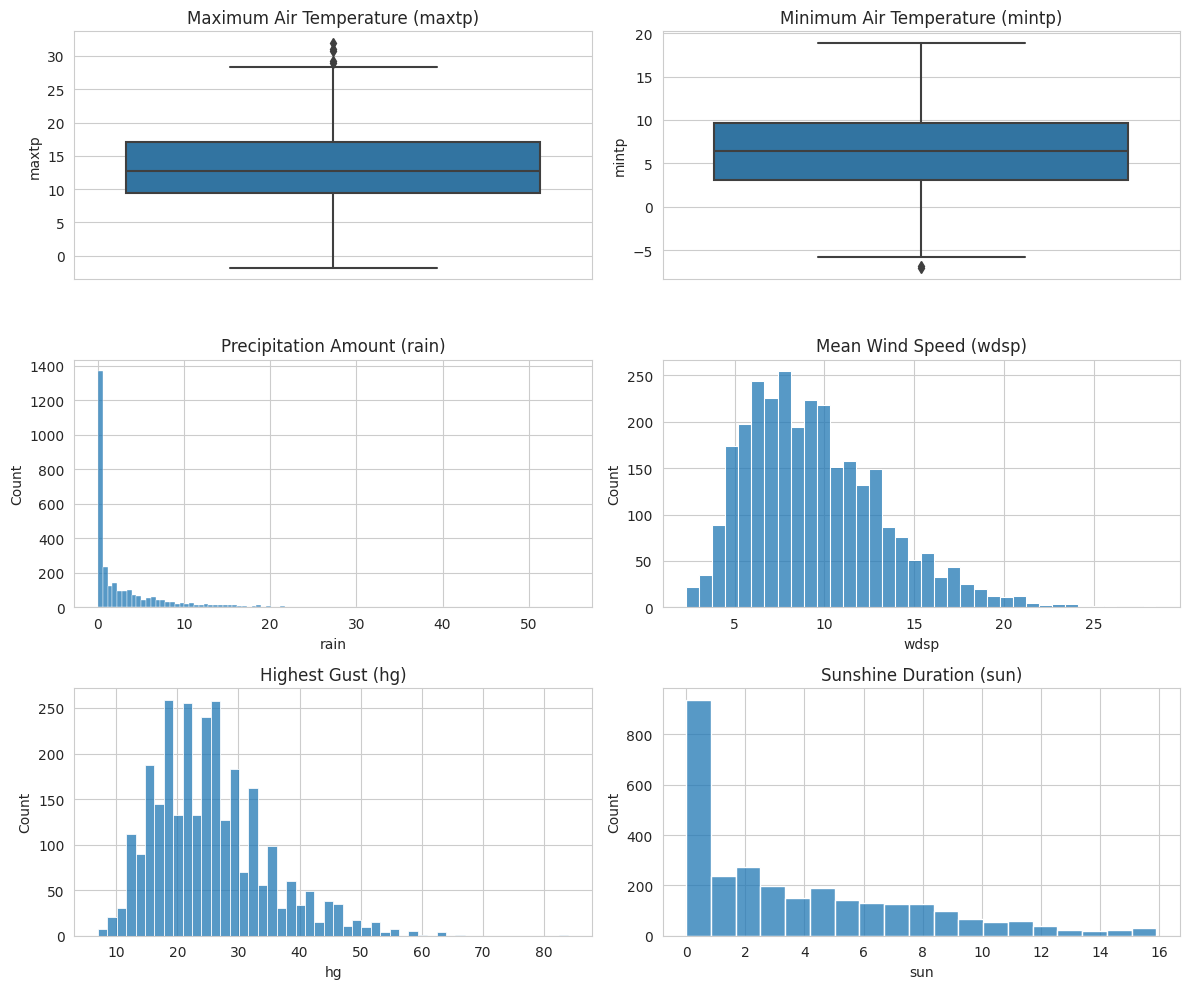

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up subplots for multiple plots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

# Plotting for Maximum Air Temperature (maxtp)
sns.boxplot(data=df, y='maxtp', ax=axes[0, 0])
axes[0, 0].set_title('Maximum Air Temperature (maxtp)')

# Plotting for Minimum Air Temperature (mintp)
sns.boxplot(data=df, y='mintp', ax=axes[0, 1])
axes[0, 1].set_title('Minimum Air Temperature (mintp)')

# Plotting for Precipitation Amount (rain)
sns.histplot(data=df, x='rain', ax=axes[1, 0,])
axes[1, 0].set_title('Precipitation Amount (rain)')

# Plotting for Mean Wind Speed (wdsp)
sns.histplot(data=df, x='wdsp', ax=axes[1, 1])
axes[1, 1].set_title('Mean Wind Speed (wdsp)')

# Plotting for Highest Gust (hg)
sns.histplot(data=df, x='hg', ax=axes[2, 0])
axes[2, 0].set_title('Highest Gust (hg)')

# Plotting for Sunshine Duration (sun)
sns.histplot(data=df, x='sun', ax=axes[2, 1])
axes[2, 1].set_title('Sunshine Duration (sun)')

plt.tight_layout()
plt.show()


Interpretation:
1)maxtp - The median temperature is 13°C, with a standard deviation of 5.15°C, indicating moderate variability. The range is from -1.80°C to 32.00°C

2)mintp - The median temperature is  approx 6°C, with a standard deviation of 4.37°C. It shows less temperature variation compared to the maximum temperature.

3)Precipitation amount- The highest frequency is shown for rainfall amount 0 and then it signbificantly declines.

4)Mean wind speed- The histogram suggests highest frequency for the range 5 to 10 windspeed. The tails represent low frequency of recorded observations.

5)Highest Gust(hg) - the highest frequencies are recorded in the range 15-25, The frequency curve is right skewed.

6)Sun- The mean sunshine duration is 3.78 hours, with a standard deviation of 3.85 hours. The range is from 0.00 to 15.90 hours, indicating variations in daily sunlight



**Question 6:** Produce a scatter plot of the mean wind speed versus the highest gust and colour your points
based on month. Interpret your plot.

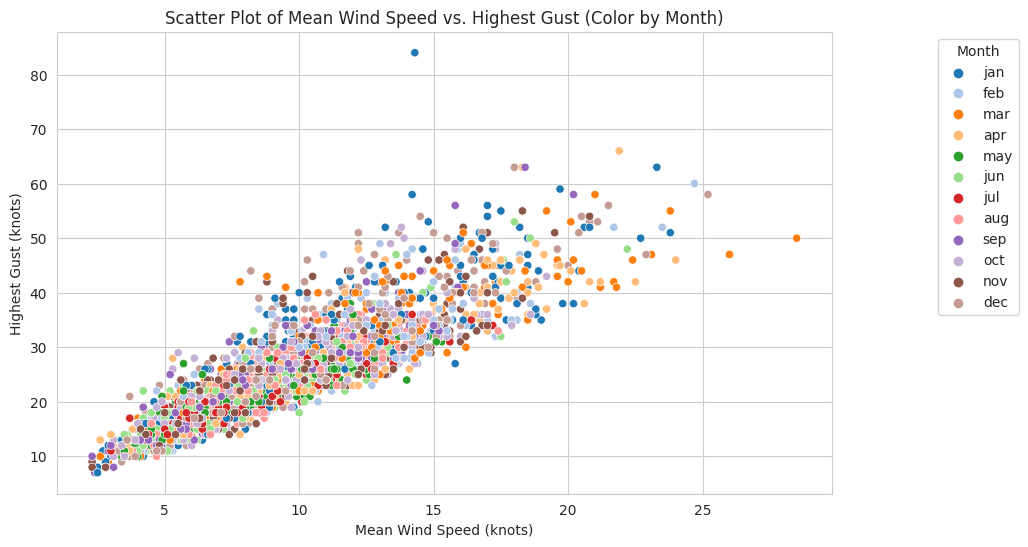

Correlation Coefficients by Month:
           wdsp
month          
apr    0.899509
aug    0.867916
dec    0.873803
feb    0.813635
jan    0.848075
jul    0.875511
jun    0.890497
mar    0.891271
may    0.889076
nov    0.823579
oct    0.856657
sep    0.896192

Summary Statistics by Month:
        wdsp                                                          hg  \
       count       mean       std  min   25%    50%     75%   max  count   
month                                                                      
apr    240.0  10.241250  4.560546  2.6  6.70   9.10  13.050  24.0  240.0   
aug    248.0   8.898790  2.671570  3.4  6.90   8.75  10.625  17.4  247.0   
dec    247.0  10.260729  4.284653  3.1  6.95   9.20  13.100  25.2  244.0   
feb    224.0  10.974107  3.661097  3.9  8.30  11.20  13.125  24.7  224.0   
jan    248.0  10.734274  4.632581  2.3  7.30   9.85  14.100  23.8  248.0   
jul    247.0   7.712955  2.496012  3.0  5.90   7.00   9.150  17.2  248.0   
jun    240.0   8.154583  3.

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the style for the plot
sns.set_style("whitegrid")

# Creating a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="wdsp", y="hg", hue="month", palette="tab20")

# Adding labels and title
plt.xlabel("Mean Wind Speed (knots)")
plt.ylabel("Highest Gust (knots)")
plt.title("Scatter Plot of Mean Wind Speed vs. Highest Gust (Color by Month)")

# Adding a legend
plt.legend(title="Month", loc="upper right", bbox_to_anchor=(1.25, 1))

# Showing the plot
plt.show()

# Calculating correlation coefficients by month
correlation_by_month = df.groupby("month")[["wdsp", "hg"]].corr().iloc[0::2, 1].unstack()

# Generating summary statistics for each month
summary_statistics_by_month = df.groupby("month")[["wdsp", "hg"]].describe()

print("Correlation Coefficients by Month:")
print(correlation_by_month)

print("\nSummary Statistics by Month:")
print(summary_statistics_by_month)


1)The plot shows that there is a positive correlation between mean wind speed and highest gust. This means that, on average, months with higher mean wind speeds also have higher highest gusts.
2)The plot also shows that there is a lot of variation in the highest gust for a given mean wind speed. This means that it is difficult to predict the highest gust based on the mean wind speed alone.

**Correlation Coefficients by Month:**

The strength of the correlation between mean wind speed ("wdsp") and highest gust ("hg") varies by month.
The months with the highest positive correlations between mean wind speed and highest gusts are April (0.900), March (0.891), and September (0.896), indicating that these months have a strong positive linear relationship between the two variables.
Months with slightly lower but still strong correlations are June (0.890), July (0.876), and May (0.889).


**Question 7:** Compute the daily temperature range, and add this as an additional variable to your
DataFrame. Print out the last 10 rows of your DataFrame to show that the column has
been added correctly.

In [99]:
# Computing daily temperature range
df['temp_range'] = df['maxtp'] - df['mintp']

# Printing the last 10 rows of the DataFrame to verify the new column
print(df.tail(10))


      day month  year        station  maxtp  mintp  rain  wdsp    hg  sun  \
2910   22   dec  2019  Knock Airport    7.0    2.7   4.8   8.0  20.0  3.1   
2911   23   dec  2019  Knock Airport    6.9    3.0   5.0  10.5  29.0  2.7   
2912   24   dec  2019  Knock Airport    6.6    3.1   0.7   8.4  24.0  2.9   
2913   25   dec  2019  Knock Airport    4.9    1.4   0.0   9.0  32.0  0.0   
2914   26   dec  2019  Knock Airport   10.0    4.8   6.2  12.2  34.0  0.0   
2915   27   dec  2019  Knock Airport   10.8    9.8   3.7  12.8  29.0  0.0   
2916   28   dec  2019  Knock Airport    9.8    7.9   0.0  14.8  30.0  0.0   
2917   29   dec  2019  Knock Airport   10.5    7.0   0.0  12.8  32.0  0.1   
2918   30   dec  2019  Knock Airport    9.6    3.4   NaN   8.4  21.0  0.0   
2919   31   dec  2019  Knock Airport    6.0    1.3   0.0   7.1  18.0  2.1   

      temp_range  
2910         4.3  
2911         3.9  
2912         3.5  
2913         3.5  
2914         5.2  
2915         1.0  
2916         1.9  


**Question 8:** Plot the daily temperature range versus the hours of sunlight per day, colouring the points
based on month. Interpret your plot.

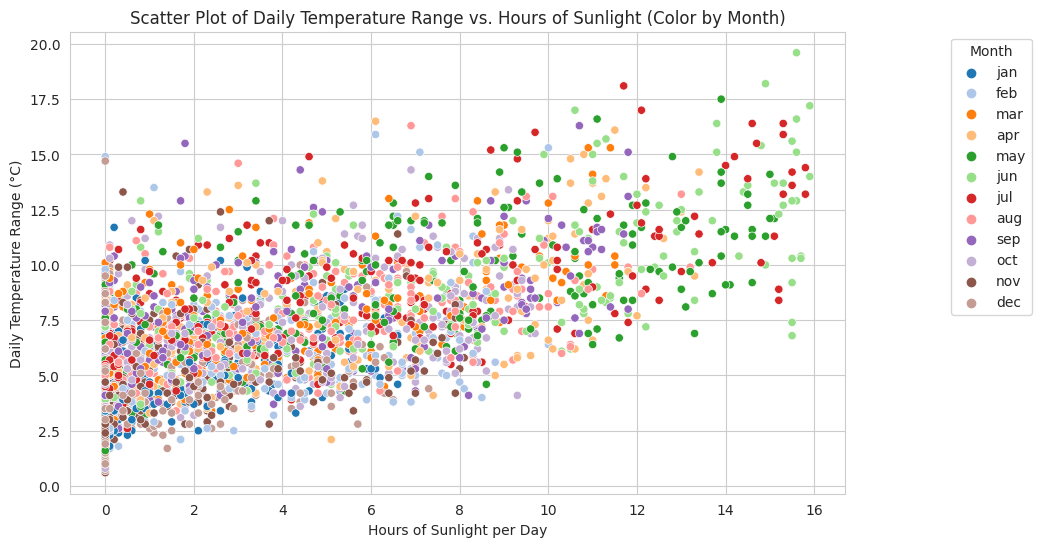

Correlation Coefficients by Month:
            sun
month          
apr    0.637481
aug    0.535697
dec    0.199808
feb    0.262198
jan    0.350395
jul    0.690658
jun    0.703475
mar    0.585645
may    0.619658
nov    0.303350
oct    0.479293
sep    0.559100

Summary Statistics by Month:
         sun                                                     temp_range  \
       count      mean       std  min    25%   50%     75%   max      count   
month                                                                         
apr    239.0  4.159833  3.894499  0.0  0.300  3.20   7.300  13.4      239.0   
aug    248.0  4.133065  3.308503  0.0  1.200  3.60   6.625  13.2      247.0   
dec    248.0  1.352016  1.812149  0.0  0.000  0.40   2.400   7.3      247.0   
feb    222.0  3.247297  2.873513  0.0  0.325  2.50   5.900  10.0      223.0   
jan    248.0  1.580645  1.854338  0.0  0.000  0.80   2.900   6.6      247.0   
jul    248.0  5.256855  4.538021  0.0  1.300  4.10   8.300  15.8      244.0   


In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="sun", y="temp_range", hue="month", palette="tab20")

# Adding labels and title
plt.xlabel("Hours of Sunlight per Day")
plt.ylabel("Daily Temperature Range (°C)")
plt.title("Scatter Plot of Daily Temperature Range vs. Hours of Sunlight (Color by Month)")

# Adding a legend
plt.legend(title="Month", loc="upper right", bbox_to_anchor=(1.25, 1))

# Showing the plot
plt.show()

# Calculating correlation coefficients and summary statistics for each month
correlation_by_month = df.groupby("month")[["sun", "temp_range"]].corr().iloc[0::2, 1].unstack()
summary_statistics_by_month = df.groupby("month")[["sun", "temp_range"]].describe()

print("Correlation Coefficients by Month:")
print(correlation_by_month)

print("\nSummary Statistics by Month:")
print(summary_statistics_by_month)


The plot shows that there is a positive correlation between daily temperature range and hours of sunlight per day. This means that, on average, days with more hours of sunlight have a wider temperature range.
The plot also shows that there is a lot of variation in the daily temperature range for a given number of hours of sunlight per day. This means that it is difficult to predict the daily temperature range based on the number of hours of sunlight per day alone.

Correlation Coefficients by Month:

The strength and direction of the correlation between hours of sunlight ("sun") and daily temperature range ("temp_range") vary by month.
Months with the highest positive correlations between sunlight and temperature range are June (0.703) and July (0.690), indicating that in these months, more sunlight is associated with a wider daily temperature range.
The months with the lowest correlations are December (0.200) and November (0.303), suggesting a weaker relationship between sunlight and temperature range during the winter months.
Summary Statistics by Month:

The summary statistics show the central tendencies (mean), spread (standard deviation), and quartiles (25th and 75th percentiles) for both "sun" and "temp_range" by month.
The months with the highest average hours of sunlight are June and July, with June having the highest mean sunlight hours (6.72 hours) and July having the second-highest (5.26 hours).
Regarding daily temperature range, the widest temperature range is observed in June (mean of 8.61°C) and July (mean of 8.43°C).
December has the lowest average sunlight hours and a relatively narrow temperature range.

In summary, the analysis shows that the relationship between sunlight and daily temperature range varies across different months, with the strongest positive correlations in the summer months (June and July), indicating that more sunlight tends to be associated with wider daily temperature variations during this time. It is also evident that the amount of sunlight and temperature range are generally lower during the winter months (December and November).

**Question 9:** Perform a comparative analysis of the weather at Dublin Airport, Shannon Airport and Cork
Airport.

In [101]:
# Calculating numerical summaries for each station
dublin_stats = df[df['station'] == 'Dublin Airport'].describe()
shannon_stats = df[df['station'] == 'Shannon Airport'].describe()
cork_stats = df[df['station'] == 'Cork Airport'].describe()

# Printing the summaries
print("Numerical Summaries for Dublin Airport:")
print(dublin_stats)
print("\nNumerical Summaries for Shannon Airport:")
print(shannon_stats)
print("\nNumerical Summaries for Cork Airport:")
print(cork_stats)



Numerical Summaries for Dublin Airport:
              day         year       maxtp       mintp        rain  \
count  730.000000   730.000000  730.000000  730.000000  726.000000   
mean    15.720548  2018.500000   13.592603    5.724247    2.147383   
std      8.802278     0.500343    5.265505    4.488748    4.120571   
min      1.000000  2018.000000   -0.500000   -5.800000    0.000000   
25%      8.000000  2018.000000    9.500000    2.400000    0.000000   
50%     16.000000  2018.500000   13.000000    5.600000    0.200000   
75%     23.000000  2019.000000   17.875000    8.900000    2.300000   
max     31.000000  2019.000000   26.700000   17.800000   24.200000   

             wdsp          hg         sun  temp_range  
count  728.000000  728.000000  729.000000  730.000000  
mean     9.542720   24.943681    4.046091    7.868356  
std      3.829729    8.438033    3.952654    3.363322  
min      3.000000    9.000000    0.000000    1.000000  
25%      6.700000   19.000000    0.600000    5.50


1. **Temperature (maxtp and mintp):**
   - Dublin Airport has a slightly lower mean maximum temperature (maxtp) compared to Shannon and Cork airports.
   - Shannon Airport has the highest mean minimum temperature (mintp) among the three airports.

2. **Rainfall (rain):**
   - Cork Airport experiences the highest mean rainfall, indicating potentially wetter conditions.
   - Dublin Airport has the lowest mean rainfall among the three airports.

3. **Wind Speed (wdsp):**
   - Dublin Airport has the highest mean wind speed (wdsp) among the three airports.
   - Shannon Airport has the second-highest mean wind speed.
   - Cork Airport has the lowest mean wind speed.

4. **Humidity (hg):**
   - Shannon Airport has the highest mean humidity (hg) level, while Dublin Airport has the lowest mean humidity.

5. **Sunshine Hours (sun):**
   - Dublin Airport has the highest mean sunshine hours, indicating more sun exposure.
   - Cork Airport and Shannon Airport have slightly lower mean sunshine hours.

6. **Temperature Range (temp_range):**
   - Dublin Airport has the widest temperature range on average, followed by Cork Airport, and then Shannon Airport.

Inferences:
- Shannon Airport generally has higher minimum temperatures and humidity, suggesting milder and more humid conditions compared to the other two airports.
- Dublin Airport experiences the highest wind speeds and the most sunshine hours on average, potentially indicating breezier and sunnier conditions.
- Cork Airport has the highest average rainfall, implying wetter weather conditions.
- Dublin Airport often experiences a wider temperature range, indicating more significant daily temperature fluctuations.

These inferences highlight the differences in weather patterns and conditions between the three airports.

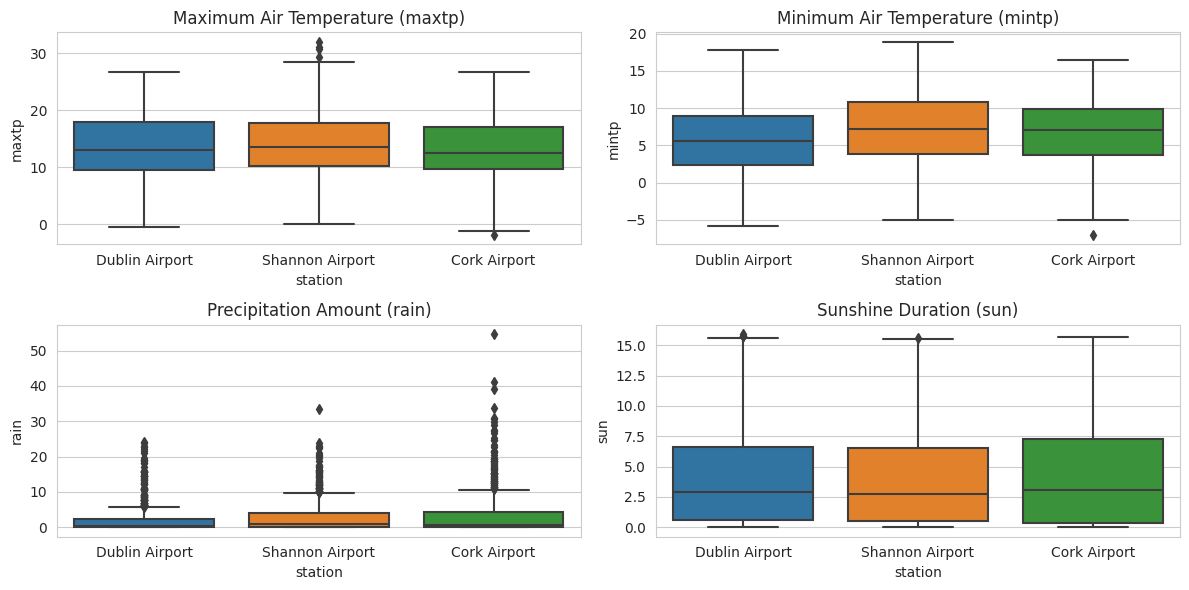

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtering the DataFrame to exclude data for "knock airport"
df_filtered = df[df['station'] != 'Knock Airport']

# Creating box plots for selected weather parameters
plt.figure(figsize=(12, 6))

# Maximum Air Temperature (maxtp)
plt.subplot(2, 2, 1)
sns.boxplot(data=df_filtered, x="station", y="maxtp")
plt.title("Maximum Air Temperature (maxtp)")

# Minimum Air Temperature (mintp)
plt.subplot(2, 2, 2)
sns.boxplot(data=df_filtered, x="station", y="mintp")
plt.title("Minimum Air Temperature (mintp)")

# Precipitation Amount (rain)
plt.subplot(2, 2, 3)
sns.boxplot(data=df_filtered, x="station", y="rain")
plt.title("Precipitation Amount (rain)")

# Sunshine Duration (sun)
plt.subplot(2, 2, 4)
sns.boxplot(data=df_filtered, x="station", y="sun")
plt.title("Sunshine Duration (sun)")

plt.tight_layout()
plt.show()
